# ChemistLab: Finding the Learning Effectiveness of three metrics
Ask For Help (AFH), Success Attempts and Tips Found

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Import csv
df = pd.read_csv(r"../csv/export.csv")

In [3]:
df.head()

,userName,T1M1SuccessAttempts,T1M2SuccessAttempts,T1M3SuccessAttempts,A1M1SuccessAttempts,A1M2SuccessAttempts,A1M3SuccessAttempts,T1M1AFHCount,T1M2AFHCount,T1M3AFHCount,A1M1AFHCount,A1M2AFHCount,A1M3AFHCount,T1M1TipsFound,T1M2TipsFound,T1M3TipsFound,A1M1TipsFound,A1M2TipsFound,A1M3TipsFound
0,NasiLmk,1,1,0,2,1,1,1,1,1,0,0,0,1,4,2,0,0,1
1,Ju5t_V,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Nickkay,2,2,0,1,1,1,0,1,1,2,2,2,2,5,4,2,3,5
3,azifh,1,1,0,1,1,1,1,1,1,1,1,1,0,1,4,0,1,4
4,zhongdanmeishan,2,2,0,1,1,1,0,1,0,0,0,0,3,7,4,3,4,5


## Create dataframe of total metrics

In [4]:
df1 = df.copy()
df1['Success Attempts'] = df1['T1M1SuccessAttempts'] + df1['T1M2SuccessAttempts'] + df1['T1M3SuccessAttempts'] + df1['A1M1SuccessAttempts'] + df1['A1M2SuccessAttempts'] + df1['A1M3SuccessAttempts']
df1['Ask For Help (AFH)'] = df1['T1M1AFHCount'] + df1['T1M2AFHCount'] + df1['T1M3AFHCount'] + df1['A1M1AFHCount'] + df1['A1M2AFHCount'] + df1['A1M3AFHCount']
df1['Tips Found'] = df1['T1M1TipsFound'] + df1['T1M2TipsFound'] + df1['T1M3TipsFound'] + df1['A1M1TipsFound'] + df1['A1M2TipsFound'] + df1['A1M3TipsFound']
df1.drop(df1.iloc[:, 0:19], inplace = True, axis = 1)
df1

,Success Attempts,Ask For Help (AFH),Tips Found
0,6,3,8
1,0,0,0
2,7,8,21
3,5,6,10
4,7,1,26
5,7,1,21
6,8,6,9
7,0,0,0
8,9,5,19
9,1,2,3


## Validating Missing Values

In [5]:
df1.isna().sum()

Success Attempts      0
Ask For Help (AFH)    0
Tips Found            0
dtype: int64

<AxesSubplot:>

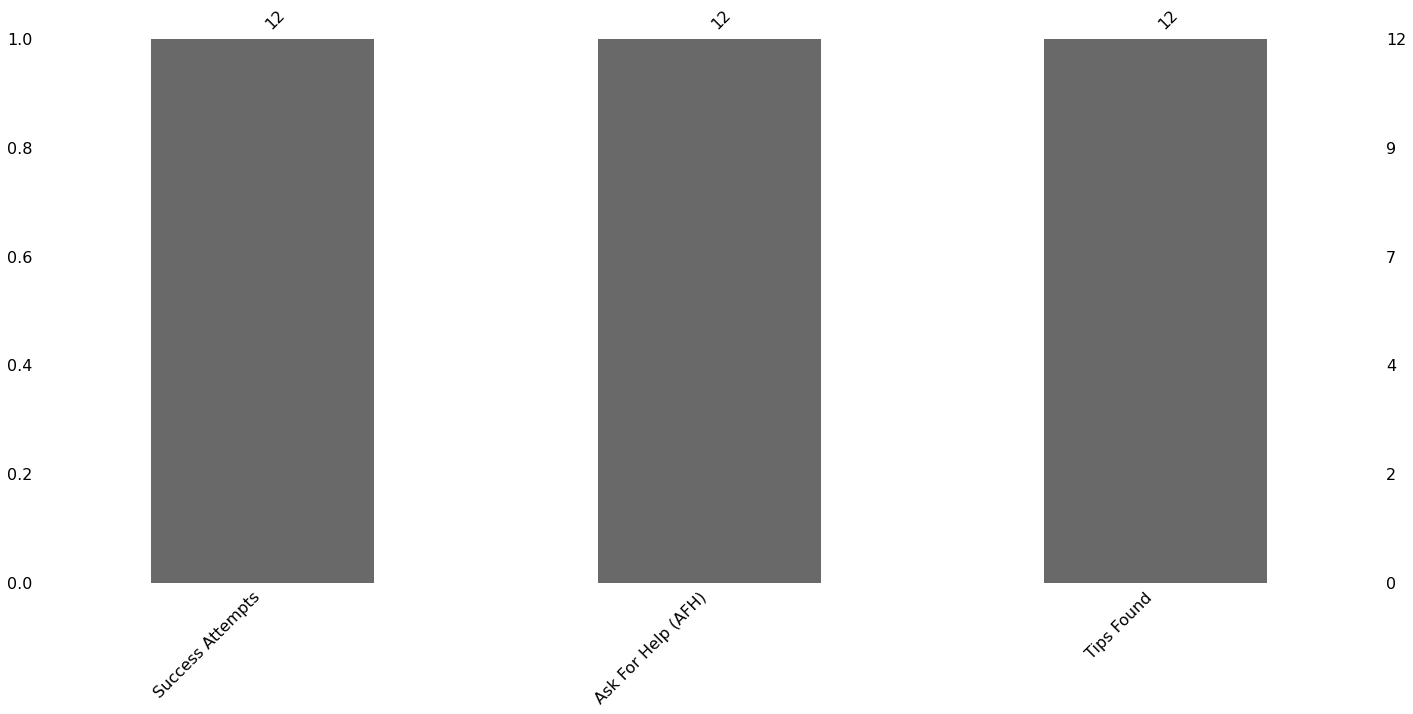

In [6]:
%matplotlib inline
msno.bar(df1)

<AxesSubplot:xlabel='variable', ylabel='value'>

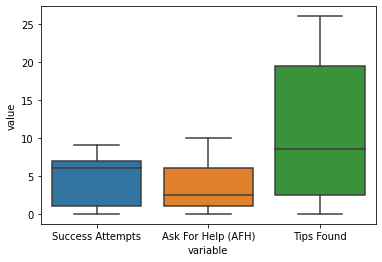

In [7]:
sns.boxplot(x="variable", y="value", data=pd.melt(df1))

## Detect and Remove Outliers Using Interquartile Range (IQR)

In [8]:
# Only Success Attempts and Ask For Help have outliers
df2 = df1.copy()
# Success Attempts
saLower = df2['Success Attempts'].quantile(0.25)
saUpper = df2['Success Attempts'].quantile(0.75)
iqr_sa = saUpper - saLower
saUpperLimit = saUpper + 1.5 * iqr_sa
saLowerLimit = saLower - 1.5 * iqr_sa
df2['Success Attempts'] = np.where(
    df2['Success Attempts'] > saUpperLimit,
    saUpperLimit,
    np.where(
        df2['Success Attempts'] < saLowerLimit,
        saLowerLimit,
        df2['Success Attempts']
    )
)
# Ask For Help
afhLower = df2['Ask For Help (AFH)'].quantile(0.25)
afhUpper = df2['Ask For Help (AFH)'].quantile(0.75)
iqr_afh = afhUpper - afhLower
afhUpperLimit = afhUpper + 1.5 * iqr_afh
afhLowerLimit = afhLower - 1.5 * iqr_afh
df2['Ask For Help (AFH)'] = np.where(
    df2['Ask For Help (AFH)'] > afhUpperLimit,
    afhUpperLimit,
    np.where(
        df2['Ask For Help (AFH)'] < afhLowerLimit,
        afhLowerLimit,
        df2['Ask For Help (AFH)']
    )
)
# Ask For Help
tfLower = df2['Tips Found'].quantile(0.25)
tfUpper = df2['Tips Found'].quantile(0.75)
iqr_tf = tfUpper - tfLower
tfUpperLimit = tfUpper + 1.5 * iqr_tf
tfLowerLimit = tfLower - 1.5 * iqr_tf
df2['Tips Found'] = np.where(
    df2['Tips Found'] > tfUpperLimit,
    tfUpperLimit,
    np.where(
        df2['Tips Found'] < tfLowerLimit,
        tfLowerLimit,
        df2['Tips Found']
    )
)

<AxesSubplot:xlabel='variable', ylabel='value'>

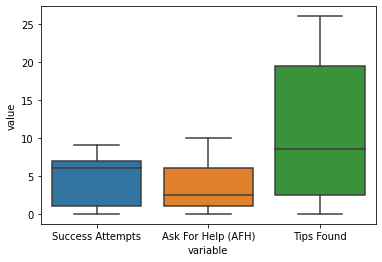

In [9]:
sns.boxplot(x="variable", y="value", data=pd.melt(df2))

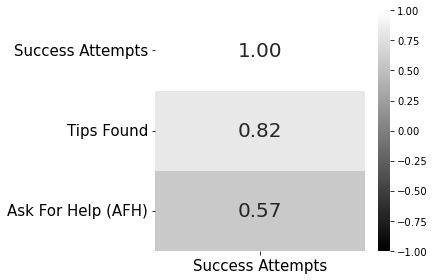

In [33]:
heatmap = sns.heatmap(df2.corr()[['Success Attempts']].sort_values(by='Success Attempts', ascending=False), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="gray", annot_kws={"fontsize": 20})
heatmap.tick_params(labelsize=15,rotation = 0)
# heatmap.axes.text(x=0.5, y=1.1, s='Correlation Heatmap of Learning Effectiveness', fontsize=12, weight='bold', ha='center', va='bottom', transform=heatmap.axes.transAxes)
# heatmap.axes.text(x=0.5, y=1.05, s='Success Attempts, Tips Found & Ask For Help (AFH)', fontsize=9.5, alpha=0.75, ha='center', va='bottom', transform=heatmap.axes.transAxes)
plt.tight_layout()
plt.savefig('heatmap', dpi = 100)